Import Libraries    

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#check matplolib styles
plt.style.use('ggplot')


In [12]:
df_weekly_items_sales = pd.read_csv('./datasets/weekly_items_sales.csv', index_col=0)

/Users/artur/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [13]:
df_weekly_items_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8354260 entries, 0 to 8354259
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   item                object 
 2   category            object 
 3   department          object 
 4   store               object 
 5   store_code          object 
 6   region              object 
 7   date                object 
 8   quantity            int64  
 9   event               int64  
 10  sell_price          float64
 11  sell_price_imputed  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 828.6+ MB


In [41]:
# specify the format since otherwise it might give some problems
df_weekly_items_sales["date"] = pd.to_datetime(df_weekly_items_sales["date"], format = "%Y-%m-%d")

In [36]:
df_weekly_items_sales.head()

,id,item,category,department,store,store_code,region,date,quantity,event,sell_price,revenue
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,0,12.7414,0.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,12.7414,0.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,12.7414,0.0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-20,0,0,12.7414,0.0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,12.7414,0.0


In [34]:
UNIQUE_COLS = ['id','item', 'category', 'department', 'store', 'store_code', 'region']

In [20]:
df_weekly_items_sales.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
quantity,8354260.0,7.863702,23.680201,0.000,0.0000,2.000,7.000,3976.00
event,8354260.0,0.094891,0.293064,0.000,0.0000,0.000,0.000,1.00
sell_price,6566711.0,5.514518,4.380482,0.012,2.6201,4.200,7.176,134.15
sell_price_imputed,8354260.0,5.562442,4.547930,0.012,2.6201,4.176,7.176,134.15


In [24]:
df_categorical_col = df_weekly_items_sales.describe(exclude=np.number).T
df_categorical_col['total'] = df_categorical_col['unique'] * df_categorical_col['freq']
df_categorical_col

,count,unique,top,freq,total
id,8354260,30490,ACCESORIES_1_001_BOS_1,274,8354260
item,8354260,3049,ACCESORIES_1_001,2740,8354260
category,8354260,3,SUPERMARKET,3937380,11812140
department,8354260,7,SUPERMARKET_3,2255020,15785140
store,8354260,10,South_End,835426,8354260
store_code,8354260,10,BOS_1,835426,8354260
region,8354260,3,New York,3341704,10025112
date,8354260,274,2011-01-30,30490,8354260


In [15]:
df_weekly_items_sales[df_weekly_items_sales['id'] == 'ACCESORIES_1_001_NYC_1'].head()

,id,item,category,department,store,store_code,region,date,quantity,event,sell_price,sell_price_imputed
822,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-01-30,0,0,NaN,12.7414
823,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-02-06,0,1,NaN,12.7414
824,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-02-13,0,0,NaN,12.7414
825,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-02-20,0,0,NaN,12.7414
826,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,2011-02-27,0,0,NaN,12.7414


In [16]:
df_weekly_items_sales.isnull().sum()

id                          0
item                        0
category                    0
department                  0
store                       0
store_code                  0
region                      0
date                        0
quantity                    0
event                       0
sell_price            1787549
sell_price_imputed          0
dtype: int64

In [ ]:
df_weekly_items_sales.drop('sell_price', axis=1, inplace=True)

In [30]:
df_weekly_items_sales.rename(columns={'sell_price_imputed': 'sell_price'}, inplace=True)
df_weekly_items_sales

,id,item,category,department,store,store_code,region,date,quantity,event,sell_price
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-30,0,0,12.7414
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-06,0,1,12.7414
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-13,0,0,12.7414
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-20,0,0,12.7414
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-27,0,0,12.7414
...,...,...,...,...,...,...,...,...,...,...,...
8354255,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-27,17,1,1.2000
8354256,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-03,22,0,1.2000
8354257,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-10,8,0,1.2000
8354258,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-04-17,0,0,1.2000


In [25]:
df_weekly_items_sales['store_code'].unique()

array(['BOS_1', 'BOS_2', 'BOS_3', 'NYC_1', 'NYC_2', 'NYC_3', 'NYC_4',
       'PHI_1', 'PHI_2', 'PHI_3'], dtype=object)

In [38]:
df_weekly_items_sales["revenue"] = df_weekly_items_sales["quantity"] * df_weekly_items_sales["sell_price"]

In [44]:
# # set index
gb_df_monthly = df_weekly_items_sales.set_index("date")

# # groupby shop_id and item_id
gb_df_monthly = gb_df_monthly.groupby(UNIQUE_COLS)

# # resample the sales to a Monthly basis
gb_df_monthly = gb_df_monthly.resample("M").agg({'quantity':np.sum, "event": np.sum, "sell_price":np.mean, "revenue":np.sum})

# # convert to dataframe and save the full dataframe
gb_df_monthly.reset_index(inplace = True)
gb_df_monthly

,id,item,category,department,store,store_code,region,date,quantity,event,sell_price,revenue
0,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-01-31,0,0,12.7414,0.0
1,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-02-28,0,1,12.7414,0.0
2,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-03-31,0,0,12.7414,0.0
3,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-04-30,0,0,12.7414,0.0
4,ACCESORIES_1_001_BOS_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,South_End,BOS_1,Boston,2011-05-31,0,0,12.7414,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1951355,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2015-12-31,42,0,1.2000,50.4
1951356,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-01-31,49,1,1.2000,58.8
1951357,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-02-29,44,1,1.2000,52.8
1951358,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,Queen_Village,PHI_3,Philadelphia,2016-03-31,55,1,1.2000,66.0


In [46]:
gb_df_monthly["month"] = gb_df_monthly["date"].dt.month
gb_df_monthly["year"] = gb_df_monthly["date"].dt.year

In [45]:
list_stores = df_weekly_items_sales['store_code'].unique()

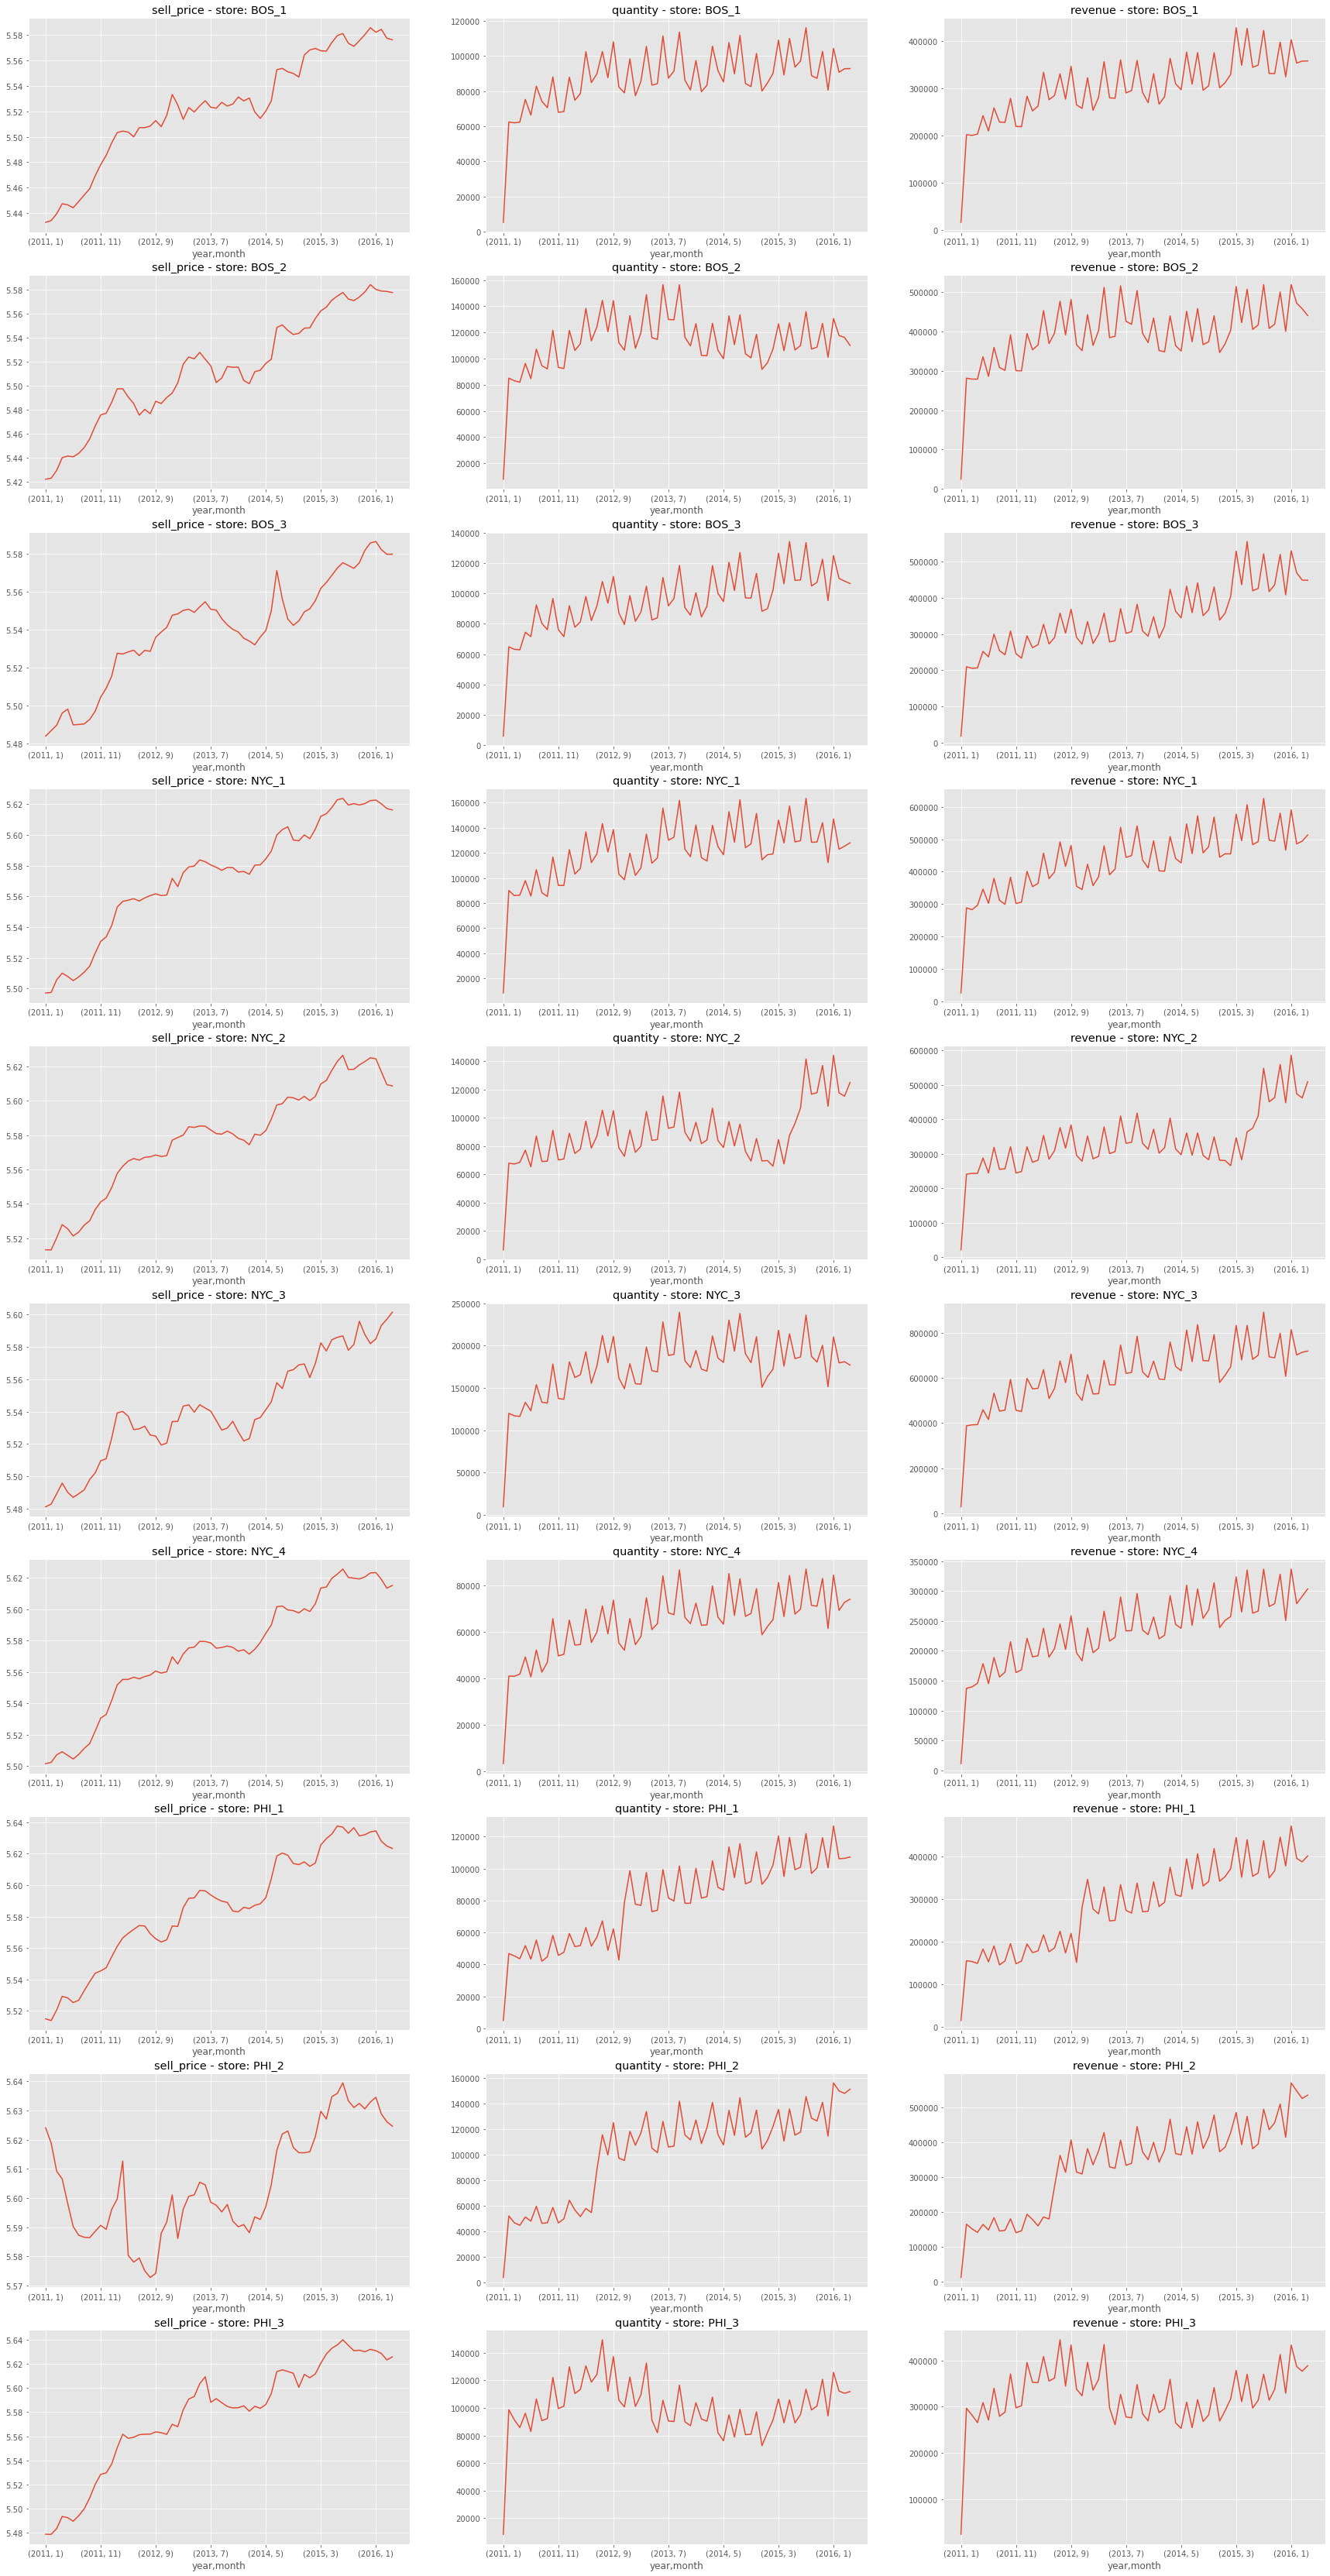

In [71]:
fig, axs = plt.subplots(len(list_stores), 3, figsize = (30, 60))
for index, store in enumerate(list_stores):
  _df_store = gb_df_monthly[gb_df_monthly["store_code"] == store].groupby(["year", "month"])
  _df_store["sell_price"].mean().plot(ax=axs[index, 0])
  axs[index, 0].set_title(f'sell_price - store: {store}')

  _df_store["quantity"].sum().plot(ax=axs[index, 1])
  axs[index, 1].set_title(f'quantity - store: {store}')

  _df_store["revenue"].sum().plot(ax=axs[index, 2])
  axs[index, 2].set_title(f'revenue - store: {store}')